## Connect with drive and fetch data.
1. Zip the folder containing images and upload it to My Drive/Colab Notebooks/projects
2. Follow the steps below



Conneting Colab with drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enter the folder name


In [2]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/Barcode Reading and Decoding/Barcode and Partial/Dataset" "/content"

# Install detectron2

In [3]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version

     |████████████████████████████████| 274 kB 4.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=e8390af2078d4abd9182114da994d6beb3b8579864f41c6a14c275f13678d803
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.5 MB/s eta 0:13:36tcmalloc: large alloc 1147494400 bytes == 0x39096000 @  0x7fd5eac16615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-3vhrgkss
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-3vhrgkss
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264334 sha256=9a4c5bb972e38370747b2d78763257352aea1d253c9f2467a75344d91d840928
  Stored in directory: /tmp/pip-ephem-wheel-cache-yfhop554/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.6+cu111 requires pycocotools>=2.0.2, but you have pycocotools 2.0 which is incompatible.
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.

In [1]:

# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
!pip install imantics

  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16033 sha256=bc23bf013e3c49bb73009218428af77917c8d3070e38a85ba461c46a527f78d8
  Stored in directory: /root/.cache/pip/wheels/da/7c/3e/296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
Successfully built imantics


Getting classes and metdata data from pickle file that is saved during training.


In [3]:
import pickle
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/Barcode Reading and Decoding/MRCNN Complete Partial/table_full_data.pkl","rb")       # Pickle Path 
example_dict = pickle.load(pickle_in)
print(example_dict)


Metadata(name='table_train', thing_classes=['complete', 'partial'])


In [10]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #model used
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8 # set threshold for this model
path2 = "/content/drive/MyDrive/Colab Notebooks/Barcode Reading and Decoding/MRCNN Complete Partial/model_final.pth"
cfg.MODEL.WEIGHTS = path2 #give weight file path
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(example_dict.thing_classes)
#cfg.DATASETS.TEST = ("ct1_test", )
predictor = DefaultPredictor(cfg)

#In os.listdir give the image path 
import os
#dataset_dicts = os.listdir("/content/drive/My Drive/Colab Notebooks/projects/%s.zip (Unzipped Files)/%s"%(fol, fol))

PATH = "/content/Dataset/test"            # Image Directory Path 

dataset_dicts = os.listdir(PATH)

This is the part where predictions happen

IMG20220501094604.jpg 0
IMG20220501093633.jpg 1
IMG20220501093600.jpg 2
IMG20220501094520.jpg 3
Total runtime of the program is 5.8890979290008545


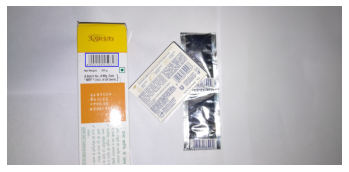

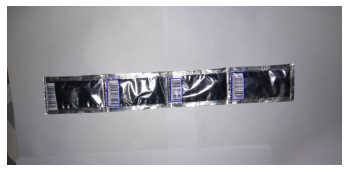

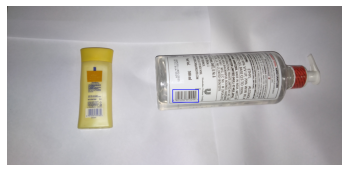

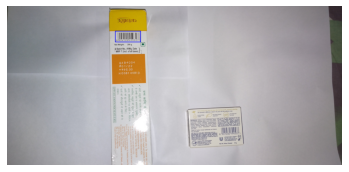

In [11]:
from detectron2.utils.visualizer import ColorMode
import cv2
import random
from google.colab.patches import cv2_imshow
import pandas as pd
from imantics import Polygons, Mask
import numpy as np 
import time
import matplotlib.pyplot as plt
%matplotlib inline


path = PATH #Give the image path
idx = 0
csv_data = []
j = 0
dic_list = pd.DataFrame(columns = ['file_name', 'boxes', 'score', 'class', 'poly_box','rect']) #if you dont want polygon coordinates remove poly_box and rect from the dataframe
begin = time.time()
for d in random.sample(dataset_dicts, len(dataset_dicts)):  
    if d.lower().endswith(('.png', '.jpg', '.jpeg')):
      im = cv2.imread(path+"/"+d)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      outputs = predictor(im) #model predictions
      #convert the predicted output to list for the dataframe
      bla = []
      print(f'{d} {j}')
      j = j + 1
      #print(outputs["instances"].pred_boxes.to("cpu"))
      instances = outputs["instances"].to("cpu")
      #print(len(instances.pred_boxes.tensor.cpu().numpy()))

      #new approach as of 30.10.2020
      for i in range(len(instances.pred_boxes.tensor.cpu().numpy())):
            score = int(instances.scores.numpy().tolist()[i] * 100)
            if score > 80:
                x1 = int(instances.pred_boxes.tensor.cpu().numpy()[i][0])
                y1 = int(instances.pred_boxes.tensor.cpu().numpy()[i][1])
                x2 = int(instances.pred_boxes.tensor.cpu().numpy()[i][2])
                y2 = int(instances.pred_boxes.tensor.cpu().numpy()[i][3])
                
                _class = instances.pred_classes.numpy().tolist()[i]
                poly = list(Mask(instances.pred_masks[i]).polygons()[0])
                csv_data.append([d, _class, x1, y1, x2, y2, '', score, poly])
                if _class == 0:
                  color = (0,0,255)
                  im = cv2.rectangle(im,(x1,y1),(x2,y2),color,5)
                else:
                  color = (0,255,255)
                  im = cv2.rectangle(im,(x1,y1),(x2,y2),color,5)

      plt.figure()
      plt.axis('off')
      plt.imshow(im)
      plt.imsave("/content/testOutput/"+d,im) 
time.sleep(1)
# store end time
end = time.time()
print(f"Total runtime of the program is {end - begin}")       

# assert False
#exporting csv
df_new = pd.DataFrame(csv_data,columns=['filename','class','x1','y1','x2','y2','extr_parameter','conf', 'poly'])
df_new.to_csv(r'/content/Mask_detectron2_TableDetection_R50_Inverted_DEXINED_Chiloquin.csv', index=False) #path to folder + 'filename.csv


In [6]:
!mkdir testOutput

In [12]:
!zip -r "/content/testOutput.zip" "/content/testOutput"

  adding: content/testOutput/ (stored 0%)
  adding: content/testOutput/IMG20220501093633.jpg (deflated 5%)
  adding: content/testOutput/IMG20220501094520.jpg (deflated 5%)
  adding: content/testOutput/IMG20220501093600.jpg (deflated 6%)
  adding: content/testOutput/IMG20220428083851.jpg (deflated 3%)
  adding: content/testOutput/IMG_20220428_083830.jpg (deflated 2%)
  adding: content/testOutput/IMG20220501094604.jpg (deflated 4%)
  adding: content/testOutput/IMG20220428083809.jpg (deflated 2%)
  adding: content/testOutput/IMG20220428083903.jpg (deflated 2%)
